## Keras

In [1]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/ColabNotebooks/Modern Computer Vision My Code/mnist_simple_cnn_25_Epochs.h5")

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np

# We reshape our test data
print(x_test.shape)
x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

# Get the predictions for all 10K samples in our test data
print("Predicting classes for all 10,000 test images...")
pred = np.argmax(model.predict(x_test), axis=-1)
print("Completed.\n")

(10000, 28, 28)
(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 3s 2ms/step
Completed.



In [4]:
import cv2
import numpy as np

result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)

print(f"Indices of misclassified data: \n{misclassified_indices}")
print(len(misclassified_indices[0]))

Indices of misclassified data: 
(array([   8,   33,   62,  149,  195,  217,  233,  241,  247,  259,  290,
        300,  318,  320,  321,  340,  341,  352,  359,  412,  445,  448,
        478,  479,  483,  502,  507,  511,  515,  531,  551,  565,  578,
        582,  591,  613,  619,  628,  658,  659,  684,  689,  691,  707,
        717,  720,  740,  791,  844,  882,  898,  939,  947,  950,  951,
        959,  965,  990,  999, 1014, 1032, 1039, 1044, 1062, 1073, 1107,
       1112, 1114, 1131, 1173, 1181, 1182, 1192, 1194, 1204, 1206, 1226,
       1232, 1234, 1242, 1247, 1260, 1272, 1283, 1289, 1299, 1319, 1325,
       1326, 1328, 1337, 1378, 1393, 1410, 1414, 1433, 1444, 1494, 1500,
       1522, 1527, 1530, 1549, 1553, 1581, 1609, 1621, 1634, 1640, 1671,
       1681, 1709, 1717, 1718, 1754, 1790, 1850, 1857, 1865, 1878, 1883,
       1901, 1911, 1917, 1938, 1940, 1952, 1970, 1981, 1984, 2016, 2024,
       2035, 2043, 2044, 2052, 2053, 2070, 2098, 2109, 2118, 2125, 2129,
       2130, 2135,

In [5]:
from matplotlib import pyplot as plt

def imshow(title="", image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")

1/1 [==============================] - 0s 186ms/step


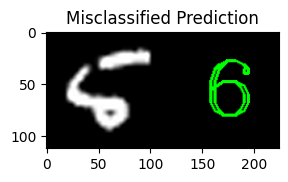

1/1 [==============================] - 0s 17ms/step


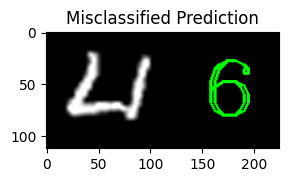

1/1 [==============================] - 0s 20ms/step


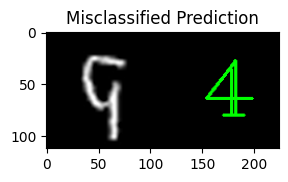

1/1 [==============================] - 0s 21ms/step


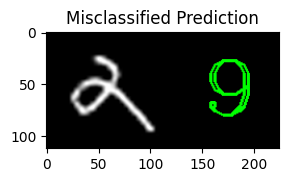

1/1 [==============================] - 0s 18ms/step


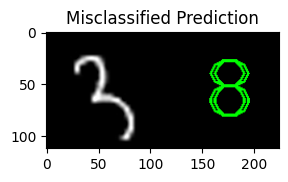

1/1 [==============================] - 0s 19ms/step


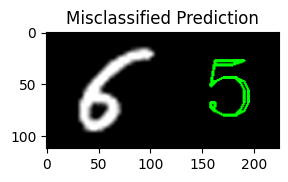

1/1 [==============================] - 0s 18ms/step


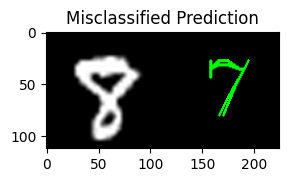

1/1 [==============================] - 0s 17ms/step


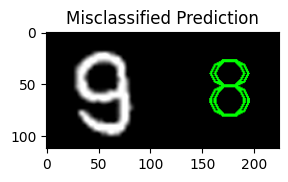

1/1 [==============================] - 0s 18ms/step


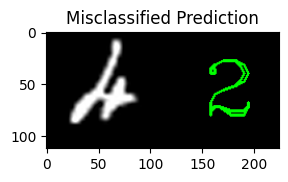

1/1 [==============================] - 0s 18ms/step


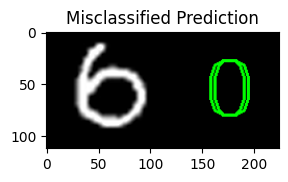

In [6]:
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    input_im = x_test[misclassified_indices[0][i]]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)

    res = str(np.argmax(model.predict(input_im), axis=-1)[0])

    draw_test("Misclassified Prediction", res,  np.uint8(imageL))

1/1 [==============================] - 0s 27ms/step


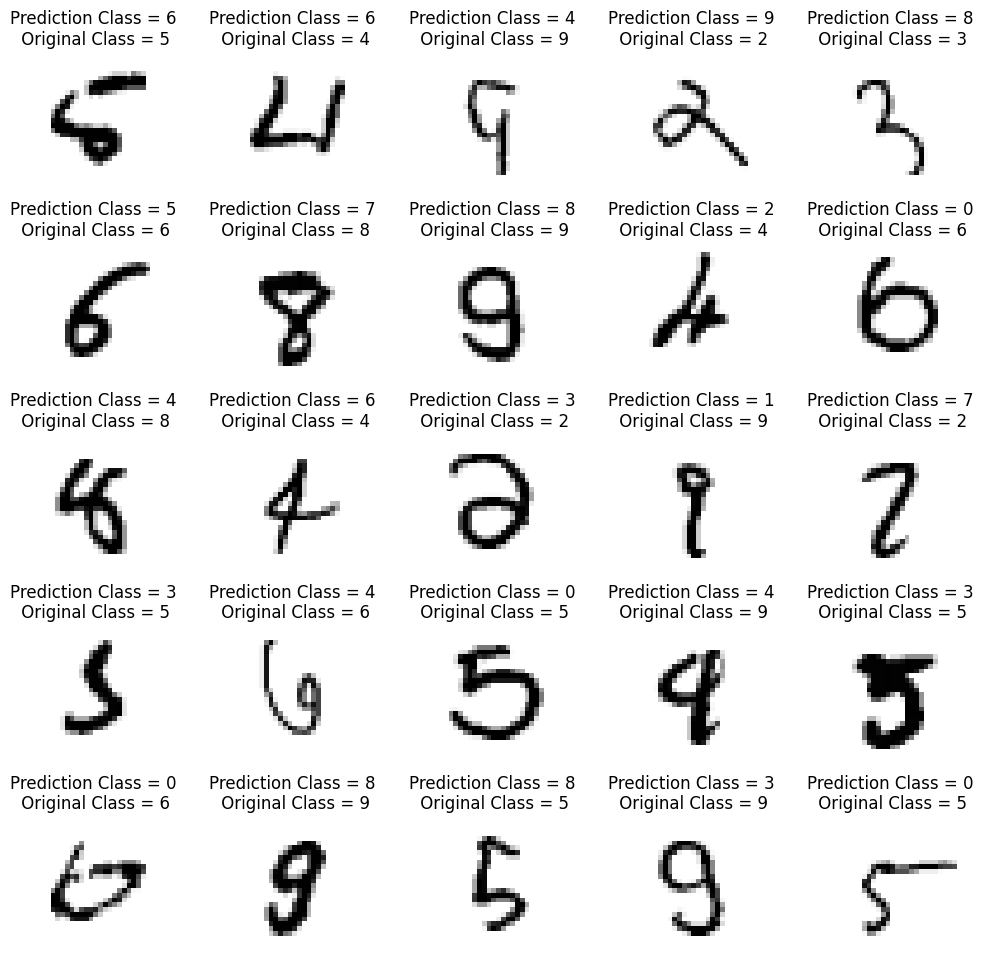

In [7]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    input_im = x_test[misclassified_indices[0][i]]
    ind = misclassified_indices[0][i]
    predicted_class = str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
    axes[i].imshow(input_im.reshape(28,28), cmap='gray_r')
    axes[i].set_title(f"Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [9]:
from sklearn.metrics import confusion_matrix

x_test = x_test.reshape(10000, 28, 28, 1)
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
[[ 970    0    1    1    0    2    3    1    2    0]
 [   0 1115    4    2    0    1    4    1    8    0]
 [   7    2  971   15    3    1    7    8   15    3]
 [   5    1    4  963    1    3    1    8   17    7]
 [   1    1    5    0  937    0   10    2    4   22]
 [  14    2    0   27    4  803   14    2   18    8]
 [   9    3    3    1    7   10  921    1    3    0]
 [   2    8   16    9    4    1    0  963    5   20]
 [   6    2    2   14    8    8   11    6  911    6]
 [   8    7    1   11   26    2    1   10    8  935]]


In [14]:
import itertools

def plot_confusion_matrix(cm,
                          target_name,
                          title="Confusion Matrix",
                          cmap=None,
                          normalize=True):

  accuracy = np.trace(cm)/np.sum(cm).astype("float")
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap("Blues")

  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_name is not None:
    tick_marks = np.arange(len(target_name))
    plt.xticks(tick_marks, target_name, rotation=45)
    plt.yticks(tick_marks, target_name)

  if normalize:
    cm = cm.astype("float")/cm.sum(axis=-1)[:, np.newaxis]

  thresh = cm.max()/1.5 if normalize else cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm[i, j]),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm[i, j]),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

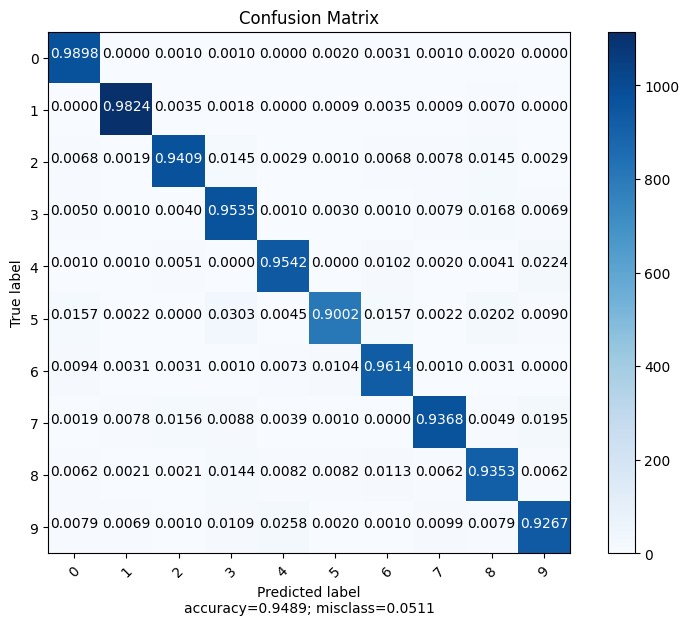

In [15]:
target_names = list(range(0, 10))
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, target_names)

In [16]:
class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)

for (i, ca) in enumerate(class_accuracy):
  print(f"Accuracy for {i}: {ca:3f}%")

Accuracy for 0: 98.979592%
Accuracy for 1: 98.237885%
Accuracy for 2: 94.089147%
Accuracy for 3: 95.346535%
Accuracy for 4: 95.417515%
Accuracy for 5: 90.022422%
Accuracy for 6: 96.137787%
Accuracy for 7: 93.677043%
Accuracy for 8: 93.531828%
Accuracy for 9: 92.666006%


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.97      0.90      0.93       892
           6       0.95      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.92      0.94      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



## PyTorch

In [18]:
import torch

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

print("GPU available: {}".format(torch.cuda.is_available()))

if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

GPU available: True


In [19]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

testset = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15733631.15it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 495657.40it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4412564.26it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7990993.61it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [21]:
net = Net()
net.to(device)

net.load_state_dict(torch.load('/content/drive/MyDrive/ColabNotebooks/Modern Computer Vision My Code/mnist_pytorch_cnn_net.pth'))

<All keys matched successfully>

In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 97.9%


In [24]:
def imgshow(title, image = None, size = 6):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

Actual Label: 6, Predicted Label: 0


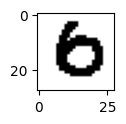

Actual Label: 9, Predicted Label: 4


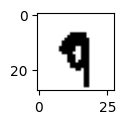

Actual Label: 4, Predicted Label: 9


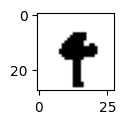

Actual Label: 1, Predicted Label: 2


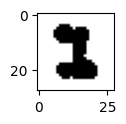

Actual Label: 2, Predicted Label: 1


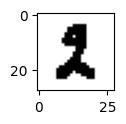

Actual Label: 3, Predicted Label: 5


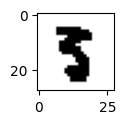

Actual Label: 1, Predicted Label: 2


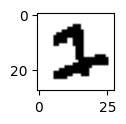

Actual Label: 8, Predicted Label: 3


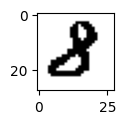

Actual Label: 7, Predicted Label: 9


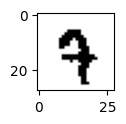

Actual Label: 4, Predicted Label: 9


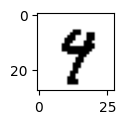

Actual Label: 7, Predicted Label: 1


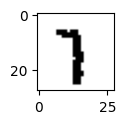

Actual Label: 9, Predicted Label: 7


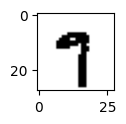

Actual Label: 3, Predicted Label: 9


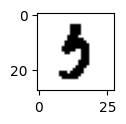

Actual Label: 2, Predicted Label: 3


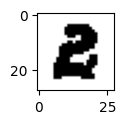

Actual Label: 0, Predicted Label: 5


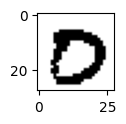

Actual Label: 7, Predicted Label: 2


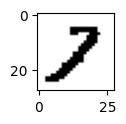

Actual Label: 5, Predicted Label: 6


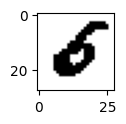

In [26]:
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        predictions = torch.argmax(outputs, dim=1)

        for i in range(10):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {label}, Predicted Label: {pred}')
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

In [27]:
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 969    0    2    1    0    2    2    1    0    3]
 [   0 1127    2    1    0    0    4    0    1    0]
 [   3    5 1010    4    2    0    2    6    0    0]
 [   1    0    2  993    0    7    0    4    2    1]
 [   0    0    2    0  967    0    4    1    0    8]
 [   4    0    0    2    0  880    3    1    1    1]
 [   6    3    1    1    1    6  940    0    0    0]
 [   1    6   15    3    0    0    0  997    0    6]
 [   8    0    3    4    5    4    8    4  933    5]
 [   4    7    0    3    8    2    0    7    0  978]]


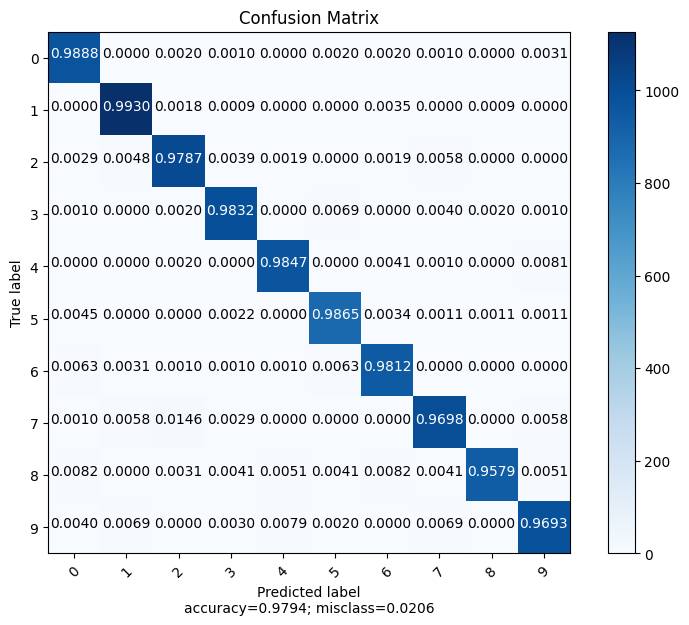

In [28]:
target_names = list(range(0,10))
plot_confusion_matrix(conf_mat, target_names)

In [29]:
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 98.878%
Accuracy for 1 : 99.295%
Accuracy for 2 : 97.868%
Accuracy for 3 : 98.317%
Accuracy for 4 : 98.473%
Accuracy for 5 : 98.655%
Accuracy for 6 : 98.121%
Accuracy for 7 : 96.984%
Accuracy for 8 : 95.791%
Accuracy for 9 : 96.928%


In [30]:
from sklearn.metrics import classification_report

print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

